#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia de datos**
###Tecnológico de Monterrey

Actividad Semanal 6

**Visualización**

###**Nombre del profesor: María de la Paz Rico
###**Nombre del estudiante: Gustavo René Ramos Ojeda
###**Matrícula: A01793599

#### The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients

In [60]:
import warnings
import seaborn as sns  
import seaborn as load_dataset
import pydotplus
import pandas as pd
import os
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt 
import math
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, KFold, train_test_split, cross_validate, learning_curve, RepeatedKFold
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn import datasets
from scipy.stats import boxcox
from IPython.display import Image


1. Descarga los datos y crea el dataframe

In [61]:
warnings.filterwarnings("ignore")

TCC = pd.read_csv("ccc.txt", index_col=0)
TCC.head()
TCC = pd.DataFrame(TCC)
#Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.
TCC.rename(columns = {
    'X1':'credito',
    'X2':'genero',
    'X3':'educacion',
    'X4':'estado_civil',
    'X5':'edad',
    'X6':'estat_sep',
    'X7':'estat_aug',
    'X8':'estat_jul',
    'X9':'estat_jun',
    'X10':'estat_may',
    'X11':'estat_apr',
    'X12':'montos_sep',
    'X13':'montos_aug',
    'X14':'montos_jul',
    'X15':'montos_jun',
    'X16':'montos_may',
    'X17':'montos_apr',
    'X18':'pagos_sep',
    'X19':'pagos_aug',
    'X20':'pagos_jul',
    'X21':'pagos_jun',
    'X22':'pagos_may',
    'X23':'pagos_apr',
 }, inplace = True)

TCC.head()

,credito,genero,educacion,estado_civil,edad,estat_sep,estat_aug,estat_jul,estat_jun,estat_may,...,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [62]:
TCC

,credito,genero,educacion,estado_civil,edad,estat_sep,estat_aug,estat_jul,estat_jun,estat_may,...,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [63]:

TCC.describe()

,credito,genero,educacion,estado_civil,edad,estat_sep,estat_aug,estat_jul,estat_jun,estat_may,...,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr,Y
count,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,29984.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,1.133296,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [64]:
TCC.shape

(30000, 24)

In [65]:
TCC.columns

Index(['credito', 'genero', 'educacion', 'estado_civil', 'edad', 'estat_sep',
       'estat_aug', 'estat_jul', 'estat_jun', 'estat_may', 'estat_apr',
       'montos_sep', 'montos_aug', 'montos_jul', 'montos_jun', 'montos_may',
       'montos_apr', 'pagos_sep', 'pagos_aug', 'pagos_jul', 'pagos_jun',
       'pagos_may', 'pagos_apr', 'Y'],
      dtype='object')

In [66]:
TCC.head()

,credito,genero,educacion,estado_civil,edad,estat_sep,estat_aug,estat_jul,estat_jun,estat_may,...,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [67]:
TCC.dtypes

credito           int64
genero          float64
educacion       float64
estado_civil    float64
edad            float64
estat_sep       float64
estat_aug       float64
estat_jul       float64
estat_jun       float64
estat_may       float64
estat_apr       float64
montos_sep      float64
montos_aug      float64
montos_jul      float64
montos_jun      float64
montos_may      float64
montos_apr      float64
pagos_sep       float64
pagos_aug       float64
pagos_jul       float64
pagos_jun       float64
pagos_may       float64
pagos_apr       float64
Y               float64
dtype: object

In [68]:
TCC.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   credito       30000 non-null  int64  
 1   genero        29999 non-null  float64
 2   educacion     29998 non-null  float64
 3   estado_civil  29998 non-null  float64
 4   edad          29995 non-null  float64
 5   estat_sep     29997 non-null  float64
 6   estat_aug     29995 non-null  float64
 7   estat_jul     29993 non-null  float64
 8   estat_jun     29991 non-null  float64
 9   estat_may     29984 non-null  float64
 10  estat_apr     29986 non-null  float64
 11  montos_sep    29989 non-null  float64
 12  montos_aug    29989 non-null  float64
 13  montos_jul    29987 non-null  float64
 14  montos_jun    29985 non-null  float64
 15  montos_may    29983 non-null  float64
 16  montos_apr    29990 non-null  float64
 17  pagos_sep     29992 non-null  float64
 18  pagos_aug     29991 non-nu

In [69]:
TCC.isna()

,credito,genero,educacion,estado_civil,edad,estat_sep,estat_aug,estat_jul,estat_jun,estat_may,...,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

In [70]:
TCC.isnull().values.any()

True

In [71]:
TCC.isnull().any()

credito         False
genero           True
educacion        True
estado_civil     True
edad             True
estat_sep        True
estat_aug        True
estat_jul        True
estat_jun        True
estat_may        True
estat_apr        True
montos_sep       True
montos_aug       True
montos_jul       True
montos_jun       True
montos_may       True
montos_apr       True
pagos_sep        True
pagos_aug        True
pagos_jul        True
pagos_jun        True
pagos_may        True
pagos_apr        True
Y                True
dtype: bool

In [72]:
# Mostar los datos faltantes
TCC[TCC.isnull()]

,credito,genero,educacion,estado_civil,edad,estat_sep,estat_aug,estat_jul,estat_jun,estat_may,...,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
# Removiendo las celdas que carecen de valores
TCC1 = TCC.copy()

#Eliminando NaNs
TCC1.dropna(inplace = True)   
TCC1.isna().values.any()

False

In [74]:
TCC1

,credito,genero,educacion,estado_civil,edad,estat_sep,estat_aug,estat_jul,estat_jun,estat_may,...,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [75]:
print("Valores nulos en la salida :\n ", TCC1.isnull().sum())

TCC1.isnull()

Valores nulos en la salida :
  credito         0
genero          0
educacion       0
estado_civil    0
edad            0
estat_sep       0
estat_aug       0
estat_jul       0
estat_jun       0
estat_may       0
estat_apr       0
montos_sep      0
montos_aug      0
montos_jul      0
montos_jun      0
montos_may      0
montos_apr      0
pagos_sep       0
pagos_aug       0
pagos_jul       0
pagos_jun       0
pagos_may       0
pagos_apr       0
Y               0
dtype: int64


,credito,genero,educacion,estado_civil,edad,estat_sep,estat_aug,estat_jul,estat_jun,estat_may,...,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr,Y
ID,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

In [76]:
TCC1.describe()

,credito,genero,educacion,estado_civil,edad,estat_sep,estat_aug,estat_jul,estat_jun,estat_may,...,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


5. Realiza el conteo de las variables categóricas

In [77]:
#Columnas categóricas
df_TCC1_cate = ['genero','educacion','estado_civil', 'estat_sep','estat_aug','estat_jul','estat_jun','estat_may','estat_apr']
#Columnas ordinales o discretas cuantitativas: 
df_TCC1_ord = ['']
#Columnas numéricas o cuantitativas: 
df_TCC1_num = ['credito', 'edad','montos_sep','montos_aug','montos_jul','montos_jun','montos_may','montos_apr','pagos_sep','pagos_aug','pagos_jul','pagos_jun','pagos_may','pagos_apr']
#Columnas binarias:
df_TCC1_bin = ['']

print("Variables categóricas: " + str(len(df_TCC1_cate)))

print("\nVariables numéricas:")
df_TCC1_num

Variables categóricas: 9

Variables numéricas:


['credito',
 'edad',
 'montos_sep',
 'montos_aug',
 'montos_jul',
 'montos_jun',
 'montos_may',
 'montos_apr',
 'pagos_sep',
 'pagos_aug',
 'pagos_jul',
 'pagos_jun',
 'pagos_may',
 'pagos_apr']

In [78]:
#Posibles valores de cada propiedad categóricas
for n in df_TCC1_cate:
  print(n + ": ", TCC1[n].unique())

genero:  [2. 1.]
educacion:  [2. 1. 3. 5. 4. 6. 0.]
estado_civil:  [1. 2. 3. 0.]
estat_sep:  [ 2. -1.  0. -2.  1.  3.  4.  8.  7.  5.  6.]
estat_aug:  [ 2.  0. -1. -2.  3.  5.  7.  4.  1.  6.  8.]
estat_jul:  [-1.  0.  2. -2.  3.  4.  6.  7.  1.  5.  8.]
estat_jun:  [-1.  0. -2.  2.  3.  4.  5.  7.  6.  1.  8.]
estat_may:  [-2.  0. -1.  2.  3.  5.  4.  7.  8.  6.]
estat_apr:  [-2.  2.  0. -1.  3.  6.  4.  7.  8.  5.]


6. Escala los datos, si consideras necesario

<AxesSubplot: >

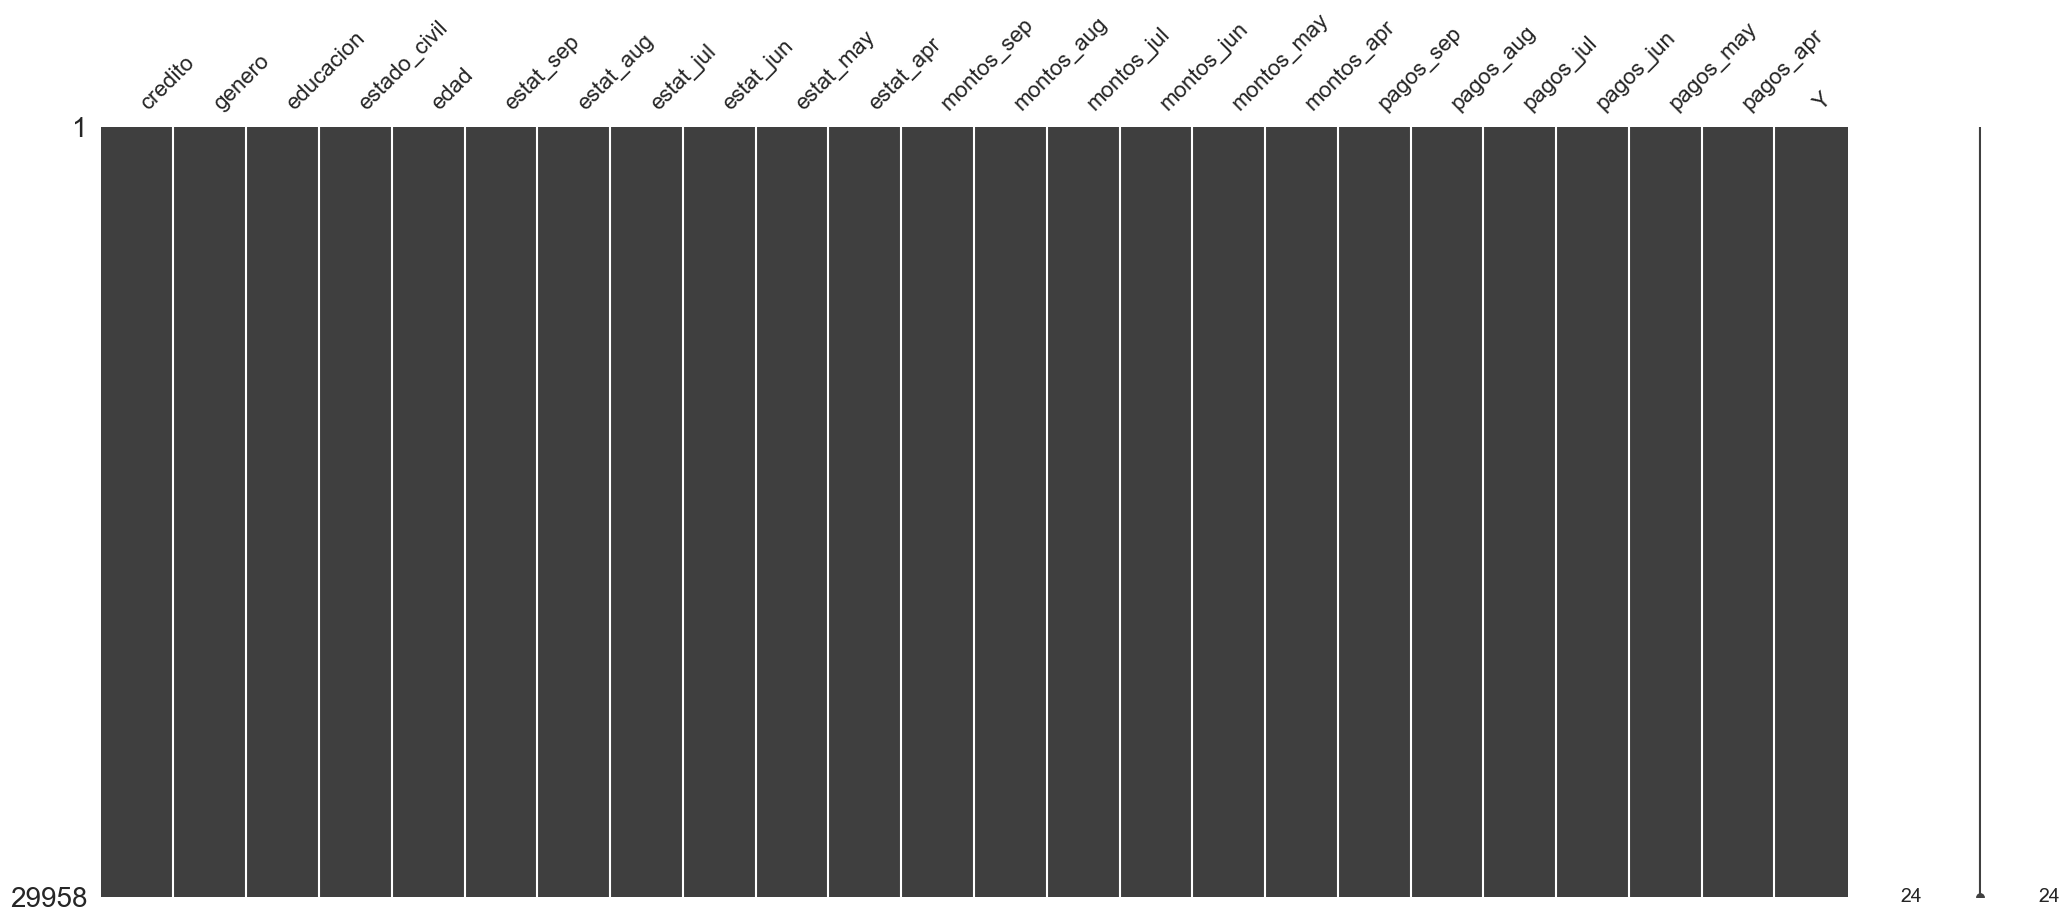

In [79]:
# Grafica de datos faltantes en los datos de entrada
msno.matrix(TCC1)

In [86]:
#Normalización para variables numéricas


num_pipeline = Pipeline(steps = [('impPromedio', SimpleImputer(strategy='mean')),
                                 ('log', FunctionTransformer(np.sqrt)),
                                 ('scalar', MinMaxScaler(feature_range=(0,1)))])

TCC1_num = TCC1[df_TCC1_num].copy()

columnasTransformerNum = ColumnTransformer(transformers = [('numerical', num_pipeline, df_TCC1_num)])
TCC1Fit = columnasTransformerNum.fit(TCC1_num)
TCC1Transf = TCC1Fit.transform(TCC1_num)
TCC1Transf


array([[0.04602373, 0.07348625, 0.06369441, ..., 0.        , 0.        ,
        0.        ],
       [0.27378907, 0.11994648, 0.05273219, ..., 0.04012862, 0.        ,
        0.06150697],
       [0.22222222, 0.28994119, 0.17411158, ..., 0.04012862, 0.0484201 ,
        0.09725105],
       ...,
       [0.08133898, 0.34842538, 0.06079616, ..., 0.08223919, 0.06847637,
        0.07657556],
       [0.20315857, 0.42283088,        nan, ..., 0.05569066, 0.35238394,
        0.05841543],
       [0.13734089, 0.51090318, 0.22291823, ..., 0.04012862, 0.0484201 ,
        0.04349199]])

In [87]:
#Pasando el array que se arroja como resultado de la transformación y normalización a un DaatFrame
df_num1 = pd.DataFrame(TCC1Transf, columns = [df_TCC1_num])
df_num1

,credito,edad,montos_sep,montos_aug,montos_jul,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr
0,0.046024,0.073486,0.063694,0.056149,0.020348,0.000000,0.000000,0.000000,0.000000,0.020226,0.000000,0.000000,0.000000,0.000000
1,0.273789,0.119946,0.052732,0.041871,0.040146,0.060579,0.061044,0.058232,0.000000,0.024367,0.033407,0.040129,0.000000,0.061507
2,0.222222,0.289941,0.174112,0.119399,0.090266,0.126782,0.126973,0.127157,0.041686,0.029843,0.033407,0.040129,0.048420,0.097251
3,0.137341,0.348425,0.220724,0.221406,0.172106,0.178205,0.176731,0.175285,0.047849,0.034623,0.036595,0.042087,0.050063,0.043492
4,0.137341,0.689160,0.094520,0.075912,0.146746,0.153252,0.143701,0.141045,0.047849,0.147576,0.105642,0.120386,0.040192,0.035838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,0.410046,0.386105,0.442606,0.442678,0.353854,0.314174,0.183550,0.128907,0.098643,0.108971,0.074723,0.070047,0.108271,0.043492
29954,0.319220,0.458671,0.041772,0.043103,0.045874,0.100353,0.074818,0.000000,0.045857,0.045755,0.100210,0.014413,0.000000,0.000000
29955,0.081339,0.348425,0.060796,0.058402,0.040711,0.153025,0.148992,0.141875,0.000000,0.000000,0.156692,0.082239,0.068476,0.076576
29956,0.203159,0.422831,NaN,0.282239,0.214134,0.243292,0.113076,0.225599,0.313583,0.044989,0.036258,0.055691,0.352384,0.058415


7. Reduce las dimensiones con PCA, si consideras necesario.
Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
Indica la importancia de las variables en cada componente

In [88]:
# Aseguramos los datos estén limpios
df_num1.dropna(inplace = True)

pcs = PCA(n_components = .725) # Se consideró un 72.5% para obtener un tercer componente

pcs.fit_transform(df_num1)
df_num1_transformed = pd.DataFrame(pcs.components_)

pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )

pcsSummary.columns = ['PC1','PC2','PC3']

pcsSummary = pcsSummary.transpose()
pcsSummary.round(2)

pcsSummary

,0,1,2
PC1,0.322697,0.186256,0.160975
PC2,0.541458,0.180383,0.134739
PC3,0.541458,0.721841,0.856580


El resultado del PCA nos indica que con solo 3 componentes podemos explicar el 85% de la proporción de la varianza, al elegir un valor de solo 70% bastaba con 2 componentes, pero al subir a 72.5% se logró aumentar el porcentaje de la proporción del 72% al 85%.

Lo anterior implica que con solo esos 3 componentes se explica una gran parte de los datos.

8. Elabora los histogramas de los atributos para visualizar su distribución

In [95]:
#Función para una gráfica estándar de histogramas

def plot_hist(TCC1_num):
  #Tamaño de la figura
  sns.set(rc={'figure.figsize':(50,10)})
  len_col = len(TCC1_num.columns)
  # ventana de 1x3 nichos para incluir en cada uno de ellos un gráfico.
  fig, axes = plt.subplots(1, len_col)
  for k in range(0,len_col):
    plt.subplot(1, len_col, k+1)
    # TCC1.columns devuelve una lista con los nombres de las columnas.
    plt.hist(TCC1[TCC1_num.columns[k]], bins=10)
    plt.xlabel(TCC1_num.columns[k])
  plt.show()

  TCC1_num.describe()

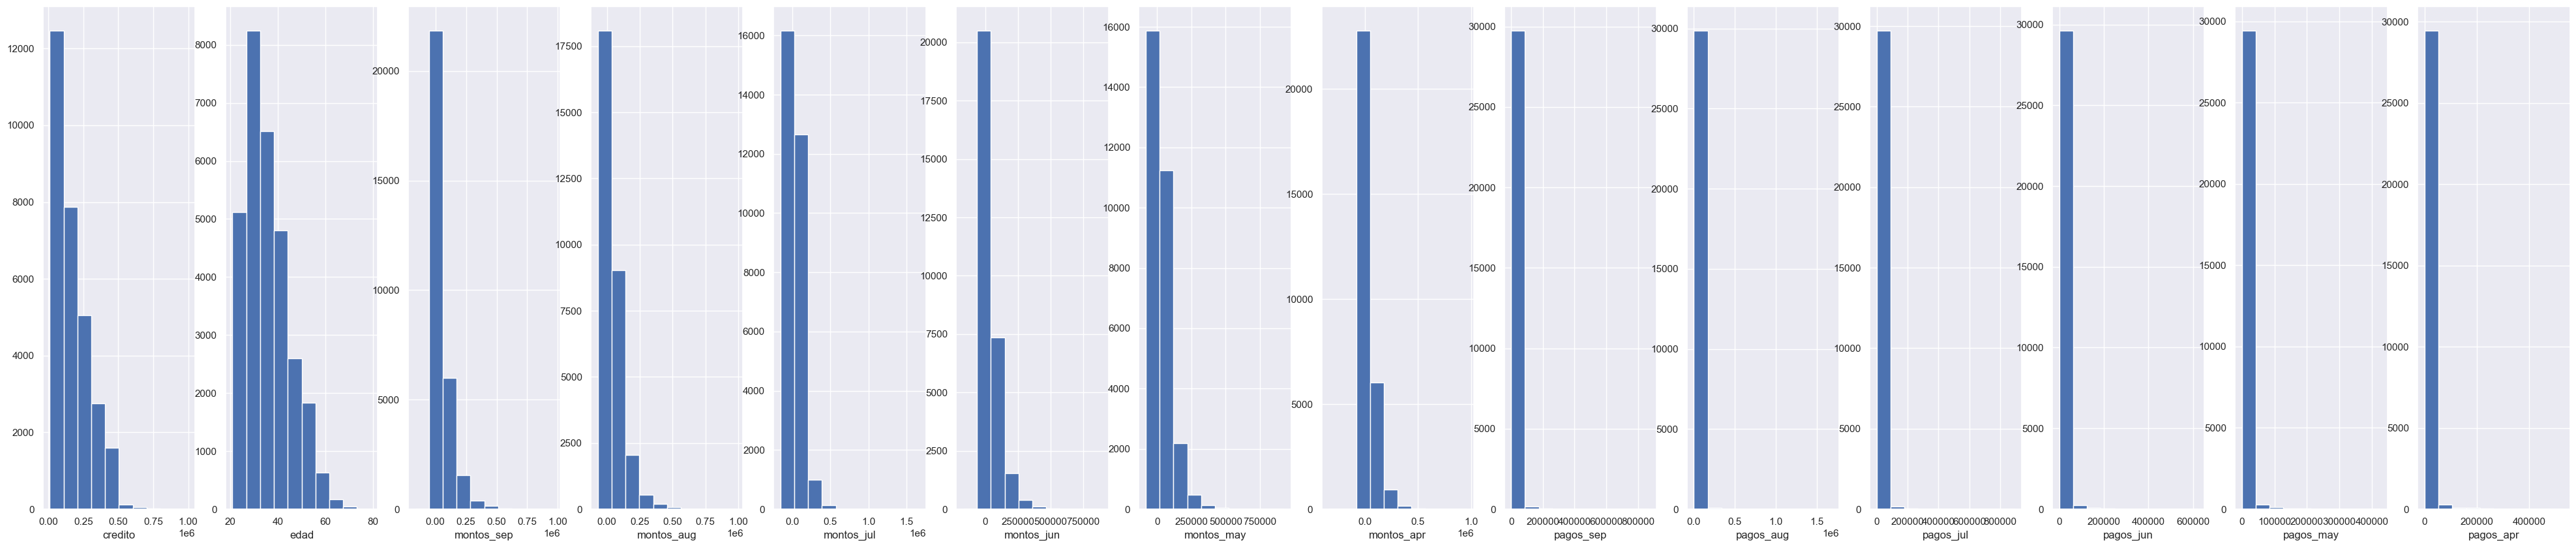

In [96]:
plot_hist(TCC1_num)

9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

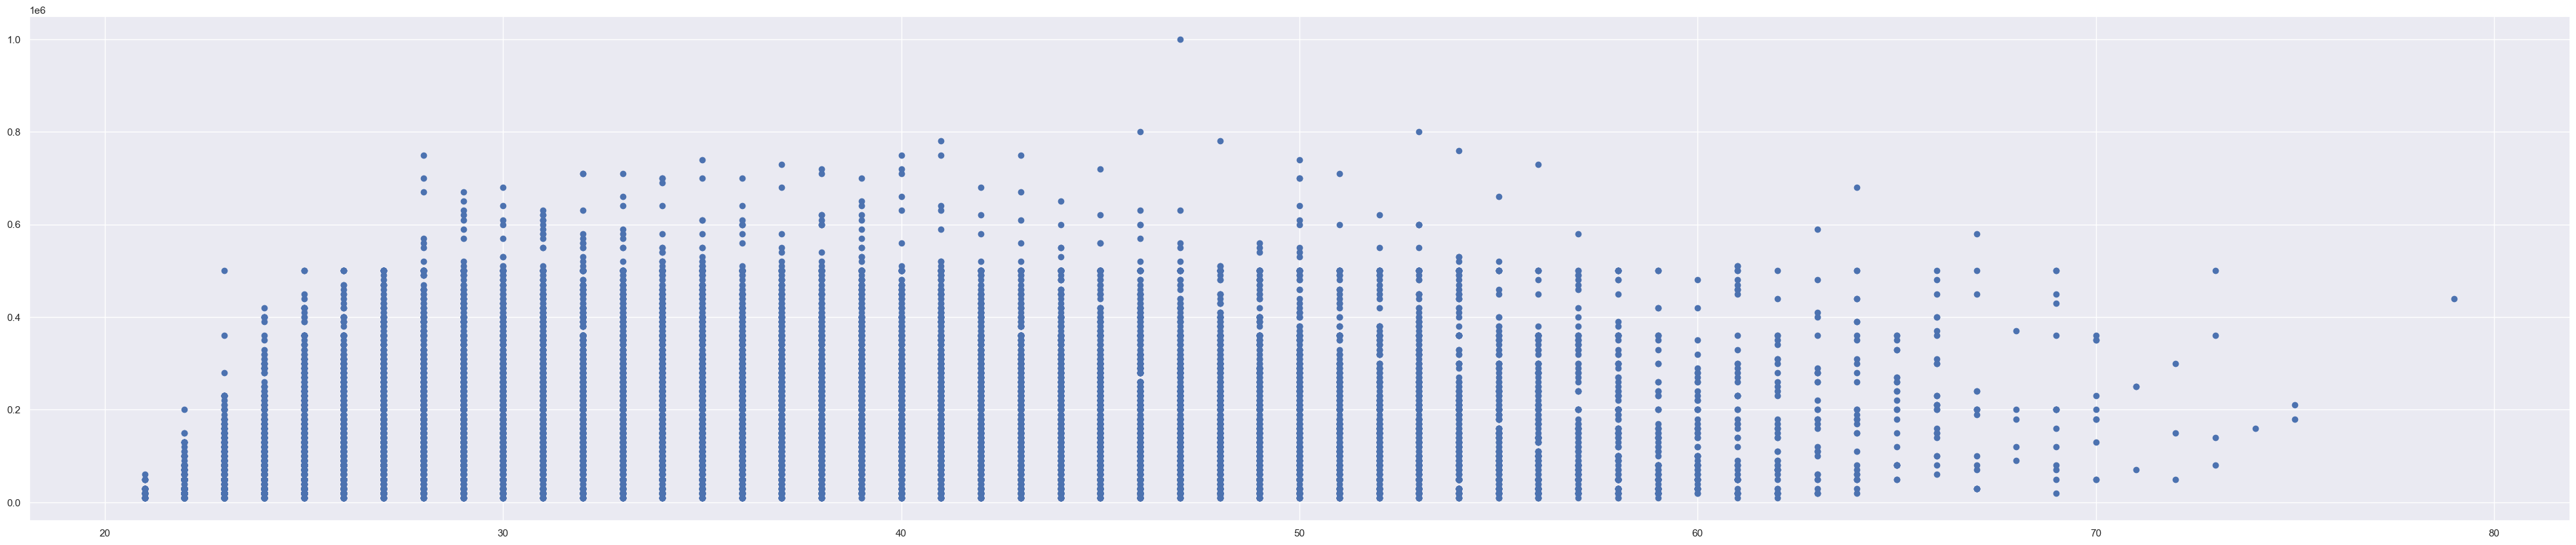

In [98]:
# Grafica #1. Uso del scatter plot
plt.scatter(TCC1_num.edad, TCC1_num.credito)
plt.show()

In [99]:
TCC1_num.describe()

,credito,edad,montos_sep,montos_aug,montos_jul,montos_jun,montos_may,montos_apr,pagos_sep,pagos_aug,pagos_jul,pagos_jun,pagos_may,pagos_apr
count,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,35.483443,51248.119901,49200.493825,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025
std,129737.299088,9.214319,73674.949943,71211.232744,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3559.250000,2984.000000,2.664750e+03,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000
50%,140000.000000,34.000000,22379.000000,21194.500000,2.008550e+04,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67190.000000,64027.750000,6.018300e+04,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


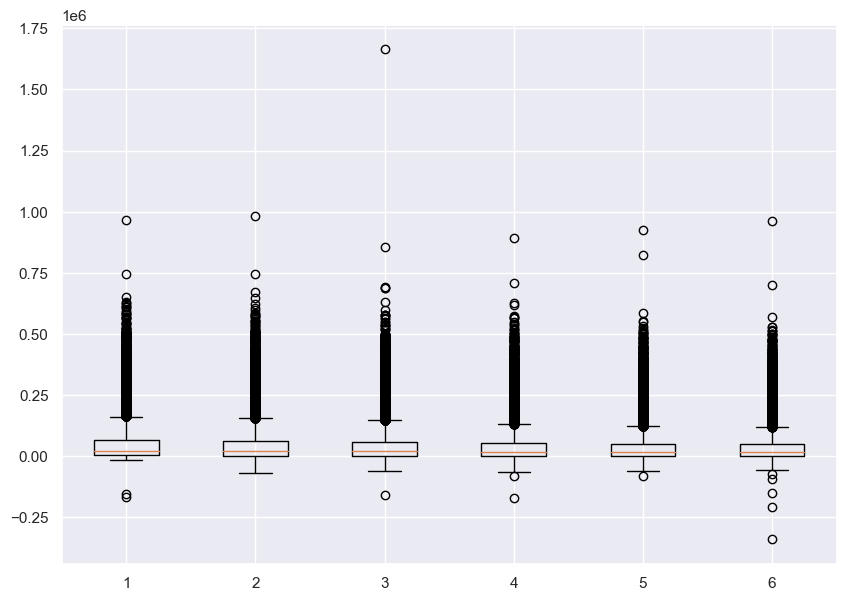

In [100]:
# Grafica #2. Uso del Boxplot

# Configuring size for Boxplot
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot((TCC1_num.montos_sep, TCC1_num.montos_aug, TCC1_num.montos_jul, TCC1_num.montos_jun,TCC1_num.montos_may,TCC1_num.montos_apr))

# show plot
plt.show()

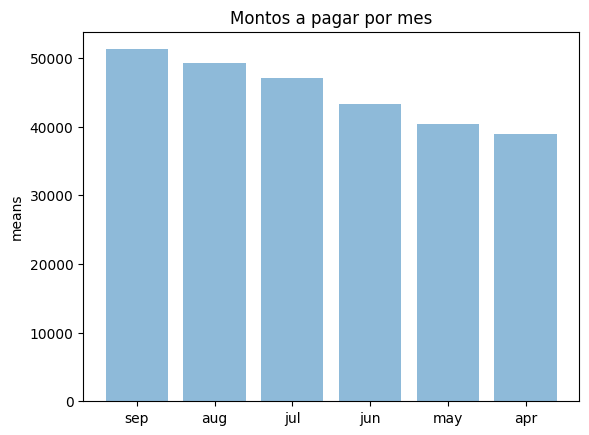

In [101]:
# Grafica #3. Uso de la gráfica de barras

import matplotlib.pyplot as plt; plt.rcdefaults()

objects = ("sep", "aug", "jul", "jun","may","apr")
y_pos = np.arange(len(objects))
means = [TCC1_num.montos_sep.mean(), TCC1_num.montos_aug.mean(), TCC1_num.montos_jul.mean(), TCC1_num.montos_jun.mean(),TCC1_num.montos_may.mean(),TCC1_num.montos_apr.mean()]


plt.bar(y_pos, means, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('means')
plt.title('Montos a pagar por mes')

plt.show()

10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.


1. Scatter plot - Con el scatter plot se puede determinar visualmente que tan fuerte es la relación o correlación de una o más variables, eso es importante porque permite ver el comportamiento de los datos y determinar qué tipo de modelo aplica a los datos.
2. Box plot - Con el box plot es fácil ver las curvas de distribución de los datos, detectar valores atípicos y ver hacia donde ir la distribución del comportamiento de un conjunto de datos, con lo que es más simple determinar la concentración e identificar los cuartiles, así como la diferencia entre la media y la mediana de los mismos datos. Con esto se puede clasificar rápidamente un dato de entrada y saber a qué pedazo de la curva de distribución pertenece.
3. Grafica de Barras - Esta gráfica permite conocer los volúmenes de ciertas características de los datos, siempre es útil para realizar comparativos sobre variables de referencia importantes e incluso de primera vista poder observar los menores o mayores valores según la naturaleza de las variables. En la toma de decisiones facilita el análisis de montos o variables de temporalidad principalmente.